In [1]:
library(dplyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [328]:
df <- read.csv(file = "C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\train.csv")

In [329]:
test2 <- read.csv(file = "C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\test.csv")

In [306]:
head(test2 )
dim (df)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,hum.temp,hum.atemp,hum.winspeed,weathersit2,weathersit3,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,2.177927,2.145335,4.193399,0,0,0
2,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,2.951304,3.193897,2.444400,0,0,0
3,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,5.372220,6.381572,2.203710,0,0,0
4,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,7.496121,6.752583,4.362929,0,0,0
5,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,3.031351,2.894390,6.199335,0,0,0
6,371,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,2.411468,2.368237,4.799253,0,0,0


[1] 365  17

In [99]:
bike.time <- df %>% 
    mutate(year,mnth) %>%
    group_by(year,mnth) %>%
    summarise(n=n(),cnt_mean=mean(cnt,na.rm=T)) %>%
    select(year,mnth,n,cnt_mean)


bike.time$cnt_mean <- ifelse(is.na(bike.time$cnt_mean),0,bike.time$cnt_mean)

bike.ts <- ts(bike.time$cnt_mean, start = c(1999, 1), end=c(2000,12), frequency = 12)

ERROR: Error: object 'year' not found


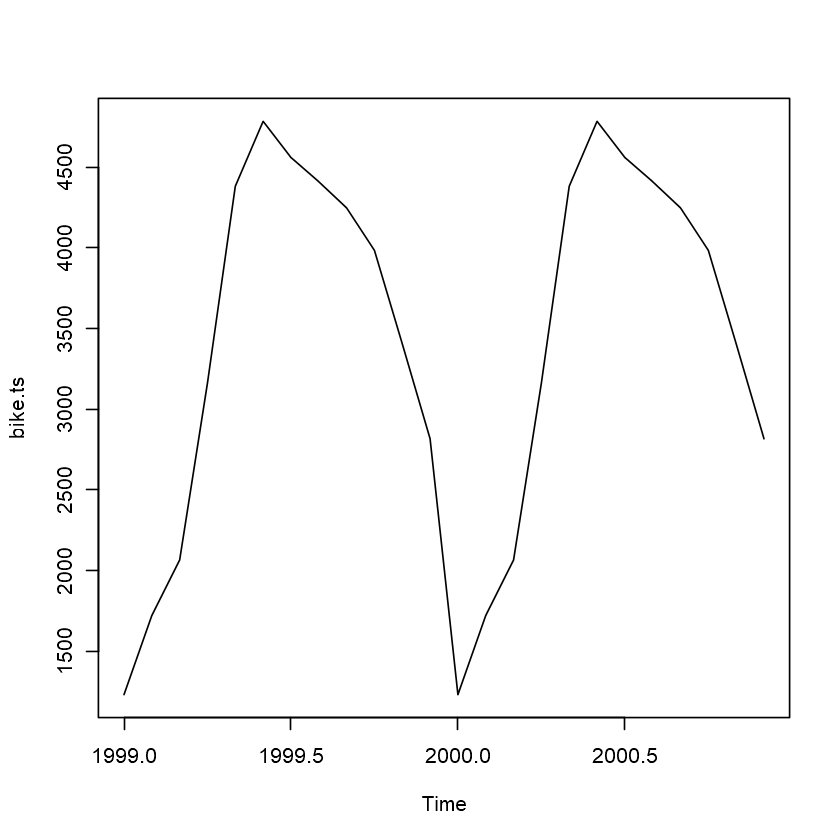

In [6]:
plot(bike.ts)

Warning message in plot.window(...):
"relative range of values (  24 * EPS) is small (axis 2)"


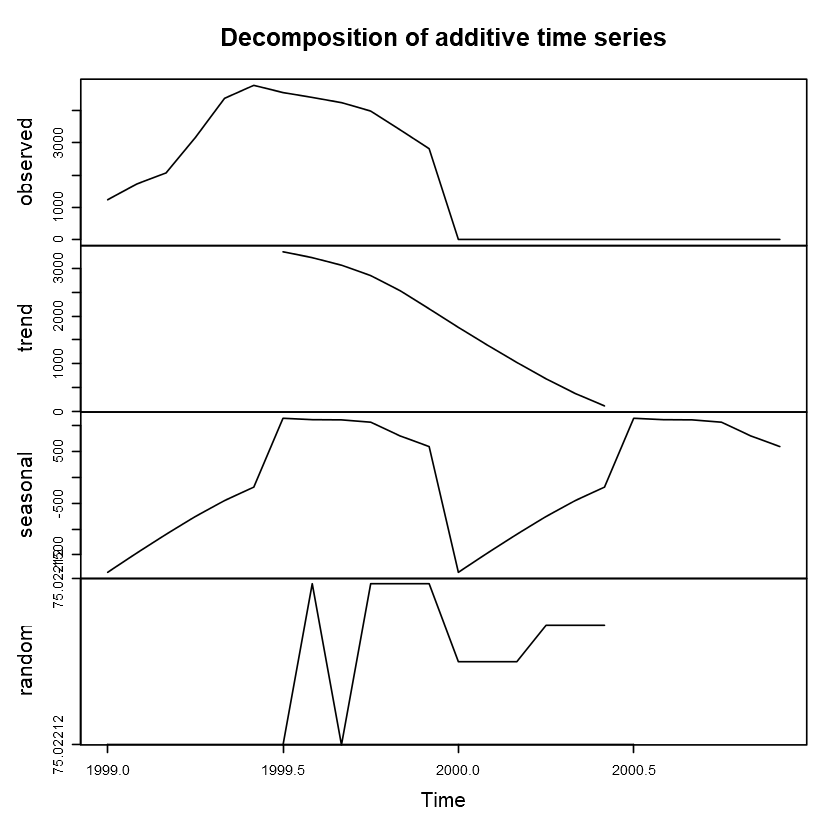

In [21]:
plot(decompose(bike.ts))

In [24]:
bike.dec <- decompose(bike.ts)
bike.dec$seasonal
montly_trend <- data.frame(month=c(1:12),season=bike.dec$seasonal[1:12]) # season=movie.dec$seasonal[1:12]) ts is matrix since we want only the first line we take the first 12 varibles 
montly_trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,-1836.9397,-1463.2408,-1102.5469,-759.5680,-451.6600,-192.3917,1138.2002,1111.2780,1106.9881,1061.7931,797.4530,590.6346
2000,-1836.9397,-1463.2408,-1102.5469,-759.5680,-451.6600,-192.3917,1138.2002,1111.2780,1106.9881,1061.7931,797.4530,590.6346


month,season
<int>,<dbl>
1,-1836.9397
2,-1463.2408
3,-1102.5469
4,-759.5680
5,-451.6600
6,-192.3917
7,1138.2002
8,1111.2780
9,1106.9881


# DATASET PARTITION

In [307]:
exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir="report", debug=FALSE, ...) {

  get_computer_type <- function(){
    # check if current R client is running on PC or on the server
    if (Sys.info()[1] == "Windows") {
      computer.type = "pc"
    } else if (Sys.info()[1] == "Linux") {
      computer.type = "server"
    }
    return(computer.type)
  }

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=T),sd=stats::sd(x,na.rm=T))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=T), "<br><u>Max date</u>:",max(x, na.rm=T) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  if (get_computer_type()=="pc") {
    srcdir <- paste0(getwd(),"/",report)
  } else {
    #srcdir <- paste0("file_show?path=",getwd(),"/",report)
    srcdir <- paste0("/view/",getwd(),"/report")
  }
  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>

      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });

      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });

      $('#myform2').submit(function(e) {
      e.preventDefault();
      });

      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });

      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });

      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });

      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });

      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });

      </script>

      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>

      </head>

      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        print(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        #print(imgname)
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  if(.Platform$OS.type == "unix") {
    system(paste("start /b ", myhtml))
  } else {
    shell(paste("explorer ", gsub("/", "\\\\", myhtml) ), intern=TRUE)
  }
}

###################### END exploreData ###############

In [308]:
exploreData(data=df, y='cnt',dir="report-r", debug=FALSE) 

  |==================================================================    |  94%

character(0)
attr(,"status")
[1] 1

In [209]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}

In [287]:
cor <- round(cor(df[,]),2)
cor

,id,season,mnth,seasonality,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,hum.temp,hum.atemp,hum.winspeed,weathersit1,weathersit2,weathersit3,cnt
id,1.00,0.83,1.00,0.88,0.03,0.01,0.00,0.01,0.29,0.30,0.24,-0.24,-0.39,-0.41,0.23,0.04,-0.08,0.11,0.44
season,0.83,1.00,0.83,0.84,0.00,-0.01,0.01,0.04,0.37,0.38,0.25,-0.24,-0.42,-0.44,0.24,0.01,-0.06,0.12,0.54
mnth,1.00,0.83,1.00,0.88,0.03,0.01,0.00,0.01,0.29,0.30,0.24,-0.24,-0.40,-0.41,0.24,0.03,-0.08,0.11,0.44
seasonality,0.88,0.84,0.88,1.00,0.01,0.01,0.00,-0.03,0.60,0.61,0.23,-0.25,-0.58,-0.60,0.20,0.07,-0.09,0.07,0.63
holiday,0.03,0.00,0.03,0.01,1.00,-0.08,-0.25,-0.01,-0.02,-0.03,-0.03,0.00,0.01,0.02,0.04,-0.01,0.02,-0.03,-0.05
weekday,0.01,-0.01,0.01,0.01,-0.08,1.00,0.02,0.05,-0.04,-0.04,-0.07,0.06,0.03,0.03,-0.06,-0.04,0.03,0.03,0.00
workingday,0.00,0.01,0.00,0.00,-0.25,0.02,1.00,0.11,0.05,0.05,0.03,0.01,-0.05,-0.05,-0.02,-0.09,0.06,0.08,0.02
weathersit,0.01,0.04,0.01,-0.03,-0.01,0.05,0.11,1.00,-0.09,-0.10,0.58,0.11,-0.01,0.00,-0.09,-0.94,0.73,0.57,-0.32
temp,0.29,0.37,0.29,0.60,-0.02,-0.04,0.05,-0.09,1.00,1.00,0.15,-0.11,-0.82,-0.84,0.01,0.09,-0.07,-0.05,0.77
atemp,0.30,0.38,0.30,0.61,-0.03,-0.04,0.05,-0.10,1.00,1.00,0.16,-0.14,-0.82,-0.86,0.04,0.09,-0.07,-0.06,0.78


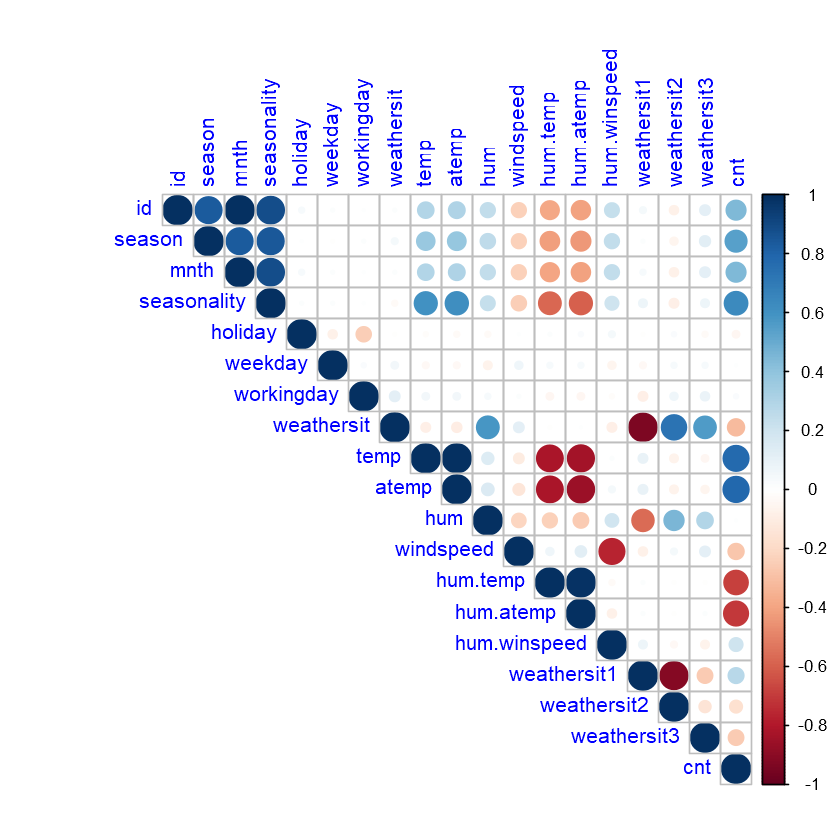

In [288]:
corrplot(cor, type = "upper", 
         tl.col = "Blue", tl.srt = 90,na.rm=TRUE)

In [330]:
Table1 <- function (x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL) {
  ### define sub-functions
  options(warn=-1)
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    #print(factorVars)
    if(is.null(factorVars)==T) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    #print(factorVars)
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==F & (v %in% factorVars)) | (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == T & sum(is.na(data[[v]])==T) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==T)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == T | is.null(factorVars)==F ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==T & categorize==T &
                       ((is.null(factorVars)==F & (v %in% factorVars)) |
                          (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==T) {
            #print(paste("The variable",v,"has no data... avoided"))
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==T) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==T & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==F ) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==T) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      utils::setTxtProgressBar(pb,ii)
      ii <- ii + 1
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")
        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==T & categorize==T & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==T & categorize==T & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==T) {
              if (messages==T) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]))[1, 4]), 3)
                } else {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE)[1, 3]), 3)
                }
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if (min(table(data[[v]],data[[y]])) > 5) {
                pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
              } else {
                if(min(table(data[[v]],data[[y]]))==0) {
                  #in cases where there are cells with zero, we use Fisher's exact test
                  tryCatch(
                    pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                    error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                } else {
                  pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                }
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as.tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==F) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==T) {
            print("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          print("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- tabaaa1 %>%
            dplyr::filter(Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))

        tabaaa1 <- tabaaa1 %>% dplyr::filter(Pop != " -- ") #%>%
      }
    }
  }
  tabaaa1 <- tabaaa1 %>% dplyr::select(-n) %>% dplyr::select(-Del)
  ##### Join the tables...
  Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    wb <- xlsx::createWorkbook()
    sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    xlsx::saveWorkbook(wb, excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = F)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==T) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==T) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}


In [331]:
train_test(data=df[,-4],train_name="train",test_name="test",prop=0.7,seed=2,tableone=TRUE)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test



  |======================================================================| 100%

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,365,255,110,NA
id,Mean (SD),183.0 (105.5),179.6 (107.8),191.0 (100.1),NA
id,Median (IQR),183.0 (92.0-274.0),177.0 (87.5-270.5),189.0 (114.2-281.8),0.343
season,Mean (SD),2.5 (1.1),2.4 (1.1),2.6 (1.1),NA
season,Median (IQR),3.0 (2.0-3.0),2.0 (1.0-3.0),3.0 (2.0-4.0),0.12
mnth,Mean (SD),6.5 (3.5),6.4 (3.5),6.8 (3.3),NA
mnth,Median (IQR),7.0 (4.0-10.0),6.0 (3.0-9.0),7.0 (4.0-10.0),0.289
weekday,Mean (SD),3.0 (2.0),3.0 (2.0),3.0 (2.0),NA
weekday,Median (IQR),3.0 (1.0-5.0),3.0 (1.0-5.0),3.0 (1.2-5.0),0.861


# MODELS

In [134]:
### The error we will use is the RMSE(root mean square error) and RMSLE(root mean square log error)
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [135]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
#new dataframe for error results
err_res <- NULL

## Linear Models

In [136]:
## model with only the original variables
mod1 <- lm(cnt ~., data=train)
summary(mod1)


Call:
lm(formula = cnt ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2355.43  -390.92   -32.43   389.50  1723.10 

Coefficients: (8 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.454e+03  8.932e+02   3.867 0.000142 ***
id           -8.308e+00  4.715e+00  -1.762 0.079354 .  
season        4.506e+02  7.213e+01   6.248 1.91e-09 ***
mnth          3.714e+02  1.493e+02   2.487 0.013564 *  
seasonality  -5.616e-01  1.527e-01  -3.677 0.000292 ***
holiday      -4.162e+02  2.808e+02  -1.482 0.139644    
weekday       2.248e+01  2.233e+01   1.007 0.315134    
workingday    7.077e+01  9.412e+01   0.752 0.452860    
weathersit   -1.553e+03  2.239e+02  -6.935 3.83e-11 ***
temp          1.380e+04  3.158e+03   4.371 1.85e-05 ***
atemp        -1.030e+04  3.720e+03  -2.768 0.006081 ** 
hum          -6.141e+02  4.195e+02  -1.464 0.144568    
windspeed    -2.100e+03  8.507e+02  -2.468 0.014294 *  
hum.temp     

In [137]:
pred1a <- predict(mod1,newdata=train)
pred1b <- predict(mod1,newdata=test)
rmse(train$cnt,pred1a)
rmse(test$cnt,pred1b)
rmsle(train$cnt,pred1a)
rmsle(test$cnt,pred1b)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                    train_RMSE=rmse(train$cnt,pred1a),
                                    test_RMSE=rmse(test$cnt,pred1b),
                                    train_RMSLE=rmsle(train$cnt,pred1a),
                                    test_RMSLE=rmsle(test$cnt,pred1b)))

[1] 634.5972

[1] 633.7312

[1] 0.2621239

[1] 0.3128502

In [138]:
Pred1 <- predict(mod1,test2, type="response")
Pred1

1            2            3            4            5            6 
 -453.685668 -1228.370929 -2191.640773 -3544.391730  -639.503962  -336.105920 
           7            8            9           10           11           12 
  -52.044003  -506.070215 -2498.146864  -707.306874 -2396.804529 -1869.522299 
          13           14           15           16           17           18 
-1002.246795 -1390.666716 -1796.969845 -1892.571862 -2269.666306  -924.531047 
          19           20           21           22           23           24 
-1423.823785 -2690.726761 -3375.483158 -3549.421267 -2821.862386  -577.041046 
          25           26           27           28           29           30 
 -754.583041 -1948.989197 -2034.946249  -797.231409  -916.394092  -825.788099 
          31           32           33           34           35           36 
 -372.939778   224.223703 -1743.380535  -460.188821 -2425.207996 -2591.797281 
          37           38           39           40           41           42 
 -749.933066  -335.072929 -2504.114906  -874.416784 -2198.157837 -4586.148347 
          43           44           45           46           47           48 
-3099.365607 -1024.133123 -2166.238064  -488.771394 -2138.321696  -645.139184 
          49           50           51           52           53           54 
 -591.651384 -2628.163374 -1356.848572  -997.388709  -418.591657    26.741760 
          55           56           57           58           59           60 
-2055.466669 -1107.948271  -980.221666  -527.578923  -443.958137 -2345.574205 
          61           62           63           64           65           66 
  158.614025 -1943.929701 -1679.788787  -813.177776 -1067.523250  -958.103321 
          67           68           69           70           71           72 
 -415.682813  -239.059397 -2037.437934  -753.011168  -624.806999   113.196670 
          73           74           75           76           77           78 
  427.996455   869.331608   685.657799 -1653.852548 -1228.563934 -1637.059791 
          79           80           81           82           83           84 
  398.056760   530.861743  -619.656647   981.566458  -190.250942 -1126.212287 
          85           86           87           88           89           90 
-1753.726630   -40.980468  -145.825584   313.873906   322.575758 -1574.231475 
          91           92           93           94           95           96 
-1689.265150 -1369.832737   168.910691   810.061395   898.604796   382.799960 
          97           98           99          100          101          102 
  137.505236   361.436153   542.067678   419.503390   297.671466  -271.387884 
         103          104          105          106          107          108 
  -16.335323   567.519254   560.553511  1032.654262   950.729302   885.181977 
         109          110          111          112          113          114 
-1148.393164   862.795551   713.943608   672.398594 -3738.982792 -2148.377915 
         115          116          117          118          119          120 
   -1.549431   625.308762 -1103.790421    24.399181 -1536.654148   298.140164 
         121          122          123          124          125          126 
-1194.804704  -202.727728  1033.018668  -525.372529  1388.641536  -227.326379 
         127          128          129          130          131          132 
 -791.339107  -908.536554  -850.506503  -737.353959   363.289690   772.159376 
         133          134          135          136          137          138 
 1120.035667   928.911003  -733.365810  -395.492736  1452.744719   941.993823 
         139          140          141          142          143          144 
  995.391309  1480.317969   954.437392  -665.046485  -350.195450  -236.736089 
         145          146          147          148          149          150 
 1407.269972  1627.240627  1455.535118  1273.777376   974.601349  1333.994989 
         151          152          153          154          

In [139]:
write.table(Pred1, file = "prediction-10-Linear model-2020-02-02.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## Desicion trees

In [332]:
library(rpart)

In [335]:
mod2 <- rpart(cnt ~., data=train)
mod2


n= 255 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 255 497957300 3341.404  
   2) hum.temp>=1.756586 125 116314000 2237.328  
     4) season< 3 87  33890120 1788.540  
       8) id< 44.5 35   4039104 1353.600 *
       9) id>=44.5 52  18773480 2081.288 *
     5) season>=3 38  24783350 3264.816  
      10) hum>=0.78375 7   6488548 2362.429 *
      11) hum< 0.78375 31  11307560 3468.581 *
   3) hum.temp< 1.756586 130  82757900 4403.015  
     6) id< 109.5 7   1290705 3057.857 *
     7) id>=109.5 123  68080200 4479.569  
      14) hum>=0.771042 24  24968640 3775.750 *
      15) hum< 0.771042 99  28340790 4650.192  
        30) hum.atemp< 1.202453 26   5433577 4199.769 *
        31) hum.atemp>=1.202453 73  15753580 4810.616 *

In [336]:
pred2a <- predict(mod2,newdata=train)
pred2b <- predict(mod2,newdata=test)
rmse(train$cnt,pred2a)
rmse(test$cnt,pred2b)
rmsle(train$cnt,pred2a)
rmsle(test$cnt,pred2b)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod2", 
                                    train_RMSE=rmse(train$cnt,pred2a),
                                    test_RMSE=rmse(test$cnt,pred2b),
                                    train_RMSLE=rmsle(train$cnt,pred2a),
                                    test_RMSLE=rmsle(test$cnt,pred2b)))

[1] 587.6347

[1] 632.1615

[1] 0.2536726

[1] 0.2939695

In [337]:
Pred2 <- predict(mod2,test2, type="matrix")
Pred2

1        2        3        4        5        6        7        8 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 
       9       10       11       12       13       14       15       16 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 
      17       18       19       20       21       22       23       24 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 
      25       26       27       28       29       30       31       32 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 4810.616 
      33       34       35       36       37       38       39       40 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 
      41       42       43       44       45       46       47       48 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 
      49       50       51       52       53       54       55       56 
2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 2081.288 
      57       58       59       60       61       62       63       64 
2081.288 2081.288 2081.288 2081.288 4810.616 2081.288 2081.288 2081.288 
      65       66       67       68       69       70       71       72 
2081.288 2081.288 2081.288 4810.616 2081.288 2081.288 2081.288 4810.616 
      73       74       75       76       77       78       79       80 
4810.616 4810.616 4810.616 2081.288 4810.616 3775.750 4810.616 3775.750 
      81       82       83       84       85       86       87       88 
3775.750 3775.750 4810.616 3775.750 2081.288 2081.288 2081.288 4810.616 
      89       90       91       92       93       94       95       96 
4810.616 2081.288 2081.288 2081.288 2081.288 4810.616 4810.616 2081.288 
      97       98       99      100      101      102      103      104 
2081.288 2081.288 4810.616 4810.616 2081.288 2081.288 2081.288 2081.288 
     105      106      107      108      109      110      111      112 
4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 
     113      114      115      116      117      118      119      120 
2081.288 2081.288 2081.288 4810.616 4810.616 2081.288 2081.288 2081.288 
     121      122      123      124      125      126      127      128 
4810.616 4810.616 3775.750 4810.616 4810.616 4810.616 4810.616 4810.616 
     129      130      131      132      133      134      135      136 
4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 3775.750 3775.750 
     137      138      139      140      141      142      143      144 
4810.616 4810.616 4810.616 4810.616 4810.616 3775.750 4810.616 3775.750 
     145      146      147      148      149      150      151      152 
4810.616 4810.616 4810.616 4810.616 4199.769 4199.769 4810.616 4810.616 
     153      154      155      156      157      158      159      160 
4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 4810.616 
     161      162      163      164      165      166      167      168 
4810.616 4810.616 4810.616 3775.750 4810.616 4810.616 4810.616 4810.616 
     169      170      171      172      173      174      175      176 
4810.616 3775.750 4810.616 4199.769 4199.769 4199.769 4810.616 4199.769 
     177      178      179      180      181      182      183      184 
4810.616 4810.616 4810.616 4199.769 4199.769 4199.769 4199.769 4199.769 
     185      186      187      188      189      190      191      192 
4199.769 4199.769 4199.769 4199.769 4199.769 4199.769 4810.616 4810.616 
     193      194      195      196      197      198      199      200 
4810.616 4810.616 4810.616 4810.616 4199.769 4199.769 4199.769 4199.769 
     201      202      203      204      205      206      207      208 
4199.769 3775.750 3775.750 4810.616 4199.769 4199.769 4810.616 4199.769 
     209      210      211      212      213      214      215      216 
4199.769 4199.769 4810.616 4199.769 4810.616 4810.616 4199.769 4199.769 
     217      218      219      220      221      222      223   

In [315]:
write.table(Pred2, file = "prediction-29-Decision-Tree-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## Random Forest

In [295]:
library(ranger)

In [296]:
#help("ranger")

In [338]:
mod3 <- ranger(cnt ~., data=train)
mod3

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  15 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       293849.7 
R squared (OOB):                  0.850112 

In [298]:
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [299]:
getMissingness(test2)

[[1]]
[1] var      na.count rate    
<0 rows> (or 0-length row.names)

[[2]]
[1] "This dataset has 366 (100%) complete rows. Original data has 366 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>


In [339]:
mod3 <- ranger(cnt ~., data=train)
mod3

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  15 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       289757.6 
R squared (OOB):                  0.8521993 

In [340]:
pred3a <- predict(mod3,train)
pred3b <- predict(mod3,test)
rmse(train$cnt,pred3a$predictions)
rmse(test$cnt,pred3b$predictions)
rmsle(train$cnt,pred3a$predictions)
rmsle(test$cnt,pred3b$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod3", 
                                    train_RMSE=rmse(train$cnt,pred3a$predictions),
                                    test_RMSE=rmse(test$cnt,pred3b$predictions),
                                    train_RMSLE=rmsle(train$cnt,pred3a$predictions),
                                    test_RMSLE=rmsle(test$cnt,pred3b$predictions)))

[1] 249.727

[1] 528.8507

[1] 0.1386495

[1] 0.2638275

In [163]:
#pred3a

In [341]:
pred3 <- predict(mod3,test2, type="response")
p3 <- pred3$predictions




In [342]:
write.table(p3, file = "prediction-30-Random-Forest-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

In [250]:
if(!require(tuneRanger)) install.packages("tuneRanger"); require(tuneRanger)
if(!require(mlr)) install.packages("mlr"); require(mlr)

In [251]:

# A mlr task has to be created in order to use the package
data(df)
df.task = makeClassifTask(data = df, target = "cnt")
 
# Estimate runtime
estimateTimeTuneRanger(df.task)


Approximated time for tuning: 52M 27S

Computing y column(s) for design. Not provided.

[mbo] 0: mtry=17; min.node.size=7; sample.fraction=0.349 : y = 1.03 : 19.8 secs : initdesign

[mbo] 0: mtry=13; min.node.size=39; sample.fraction=0.594 : y = 1.01 : 7.0 secs : initdesign

[mbo] 0: mtry=7; min.node.size=22; sample.fraction=0.783 : y = 1.02 : 6.7 secs : initdesign

[mbo] 0: mtry=17; min.node.size=9; sample.fraction=0.791 : y = 1.04 : 33.8 secs : initdesign

[mbo] 0: mtry=12; min.node.size=4; sample.fraction=0.538 : y = 1.04 : 23.0 secs : initdesign

[mbo] 0: mtry=2; min.node.size=2; sample.fraction=0.702 : y = 1.02 : 3.6 secs : initdesign

[mbo] 0: mtry=15; min.node.size=34; sample.fraction=0.201 : y = 1.01 : 2.9 secs : initdesign

[mbo] 0: mtry=20; min.node.size=25; sample.fraction=0.747 : y = 1.02 : 19.4 secs : initdesign

[mbo] 0: mtry=24; min.node.size=2; sample.fraction=0.443 : y = 1.05 : 40.6 secs : initdesign

[mbo] 0: mtry=8; min.node.size=3; sample.fraction=0.38 : y = 1.04 : 13.5 secs : initdesign

[mbo] 0: mtry=5

[mbo] 61: mtry=15; min.node.size=73; sample.fraction=0.207 : y = 1 : 1.0 secs : infill_cb

[mbo] 62: mtry=17; min.node.size=73; sample.fraction=0.234 : y = 1 : 1.5 secs : infill_cb

[mbo] 63: mtry=1; min.node.size=68; sample.fraction=0.434 : y = 1 : 0.6 secs : infill_cb

[mbo] 64: mtry=1; min.node.size=72; sample.fraction=0.206 : y = 1 : 0.5 secs : infill_cb

[mbo] 65: mtry=1; min.node.size=47; sample.fraction=0.42 : y = 1 : 0.7 secs : infill_cb

[mbo] 66: mtry=1; min.node.size=71; sample.fraction=0.791 : y = 1 : 0.7 secs : infill_cb

[mbo] 67: mtry=21; min.node.size=70; sample.fraction=0.204 : y = 1 : 1.6 secs : infill_cb

[mbo] 68: mtry=1; min.node.size=44; sample.fraction=0.377 : y = 1 : 0.7 secs : infill_cb

[mbo] 69: mtry=17; min.node.size=73; sample.fraction=0.209 : y = 1 : 1.2 secs : infill_cb

[mbo] 70: mtry=10; min.node.size=73; sample.fraction=0.201 : y = 1 : 0.5 secs : infill_cb



Recommended parameter settings: 
  mtry min.node.size sample.fraction
1    6            73        0.203887
Results: 
  multiclass.brier exec.time
1         1.002678      0.54

Model for learner.id=classif.ranger; learner.class=classif.ranger
Trained on: task.id = df; obs = 365; features = 25
Hyperparameters: num.threads=2,verbose=FALSE,respect.unordered.factors=order,mtry=6,min.node.size=73,sample.fraction=0.204,num.trees=1e+03,replace=FALSE

Prediction: 366 observations
predict.type: prob
threshold: 431=0.00,506=0.00,605=0.00,623=0.00,627=0.00,683=0.00,705=0.00,754=0.00,795=0.00,801=0.00,822=0.00,959=0.00,981=0.00,985=0.00,986=0.00,1000=0.00,1005=0.00,1011=0.00,1096=0.00,1098=0.00,1107=0.00,1115=0.00,1162=0.00,1167=0.00,1204=0.00,1248=0.00,1263=0.00,1317=0.00,1321=0.00,1349=0.00,1360=0.00,1406=0.00,1416=0.00,1421=0.00,1446=0.00,1450=0.00,1461=0.00,1471=0.00,1472=0.00,1495=0.00,1501=0.00,1510=0.00,1526=0.00,1530=0.00,1536=0.00,1538=0.00,1543=0.00,1550=0.00,1562=0.00,1589=0.00,1600=0.00,1605=0.00,1606=0.00,1607=0.00,1623=0.00,1635=0.00,1650=0.00,1683=0.00,1685=0.00,1693=0.00,1708=0.00,1712=0.00,1746=0.00,1795=0.00,1807=0.00,1812=0.00,1815=0.00,1817=0.00,1842=0.00,1851=0.00,1865=0.00,1872=0.00,1891=0.00,1913=0.00,1917=0.00,1927=0.00,1944=0.00,1969=0.00,1977=0.00,1985=0.00,1996=0.00,2028=0.00,2034=0.00,2046=0.00,2056=0.00,2077=0.00,2115=0.00,2121=0.00,2132=0.00,2133=0.00,2134=0.00,2162=0.00,2192=0.00,2209=0.00,2210=0.00,2227=0

In [ ]:
# Tuning
res = tuneRanger(df.task, measure = list(multiclass.brier), num.trees = 1000, 
  num.threads = 2, iters = 70, save.file.path = NULL)
  
# Mean of best 5 % of the results
res
# Model with the new tuned hyperparameters
res$model

In [253]:

# Prediction
Pred13 <- predict(res$model, newdata = test2)

In [254]:
write.table(Pred13, file = "prediction-25-Random-Forest-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## XGBoost

In [255]:
#install.packages("xgboost")
library(xgboost)

In [256]:
train1 <- Matrix::sparse.model.matrix(cnt ~ ., data = train)
test1 <- Matrix::sparse.model.matrix(cnt ~ ., data = test)

In [257]:
dim(train1)
dim(test1)

[1] 255  25

[1] 110  25

In [258]:
X_train <- train1
y_train <- train$cnt
mod4 <- xgboost(data=X_train,label=y_train, nrounds=150,print_every_n = 10 )

[1]	train-rmse:2583.192871 
[11]	train-rmse:168.833725 
[21]	train-rmse:55.264488 
[31]	train-rmse:28.674696 
[41]	train-rmse:17.852310 
[51]	train-rmse:10.895459 
[61]	train-rmse:6.328245 
[71]	train-rmse:3.895642 
[81]	train-rmse:2.560401 
[91]	train-rmse:1.543371 
[101]	train-rmse:0.981213 
[111]	train-rmse:0.650527 
[121]	train-rmse:0.396693 
[131]	train-rmse:0.263574 
[141]	train-rmse:0.167337 
[150]	train-rmse:0.107959 


In [259]:
pred4a <- predict(mod4,train1)
pred4b <- predict(mod4,test1)
rmse(train$cnt,pred4a)
rmse(test$cnt,pred4b)
rmsle(train$cnt,pred4a)
rmsle(test$cnt,pred4b)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod4", 
                                    train_RMSE=rmse(train$cnt,pred4a),
                                    test_RMSE=rmse(test$cnt,pred4b),
                                    train_RMSLE=rmsle(train$cnt,pred4a),
                                    test_RMSLE=rmsle(test$cnt,pred4b)))

[1] 0.1079586

[1] 498.8094

[1] 3.630528e-05

[1] 0.2500482

In [260]:
testxg <- Matrix::sparse.model.matrix(cnt ~ ., data = test2[,-4])

In [261]:
Pred4 <- predict(mod4,testxg, type="prob")
Pred4


[1] 1529.5239 1586.3325 1712.7316 1925.5896 2318.0095 2290.9353 2401.5293
  [8] 2013.9745 1066.1510 1345.1572 1649.9617 1840.3074 2212.8394 1762.4048
 [15] 1632.3762 1460.2603 1529.6171 1550.5325 2127.2573 2032.5022 1220.8527
 [22]  823.6060 1082.8145 1528.5713 1369.8706 2587.0364 1845.0906 2355.4678
 [29] 1702.1857 1816.1569 2256.2644 4426.2310 1904.1997 2418.7432 1361.8770
 [36]  864.2749 1750.8518 2165.2671 1517.8055 1974.5314 2172.6099  908.6909
 [43] 1608.8934 1684.1160 2163.4536 2508.4526 1934.7284 2465.2593 2351.0105
 [50] 1745.7188 1481.7587 1785.4049 2577.0652 2566.2512 2042.2673 2091.9343
 [57] 1747.6547 2334.4014 2192.2366 1565.3849 4586.1284 1738.2181 2363.4592
 [64] 2199.6091 1790.5067 1752.3138 2405.6453 2591.0991 2349.1895 1978.6167
 [71] 2127.0286 4566.1680 4567.6128 4861.0034 4740.1924 2207.3435 4434.0024
 [78] 3736.0757 3969.8718 4243.2817 4288.5625 4277.9907 4464.9067 3532.6074
 [85] 1793.0295 1903.3339 1967.9757 4556.9004 4551.1606 2588.0852 2244.5020
 [92] 1844.2191 2093.0061 4725.0063 4726.1128 2464.7529 2324.8184 2258.4194
 [99] 4520.5420 4585.9165 2069.5422 2339.8323 2333.6047 2260.2266 4440.7319
[106] 4792.1323 4194.3994 4787.3696 3618.8123 4770.1904 4391.3950 4248.6802
[113] 1147.0790 1601.3621 2061.3218 4600.3921 3352.9424 2123.7539 2814.9404
[120] 2129.4543 4406.5952 4122.6128 4062.5466 4263.0605 4285.4351 4073.1145
[127] 4149.1953 4037.8081 4070.0520 3834.7305 4543.7793 4857.5234 5074.9897
[134] 4866.6592 3705.4678 4012.6094 4346.4980 4821.9858 4859.1235 5013.1377
[141] 4809.2319 3864.6824 4237.3032 4282.7607 4296.4858 4291.0674 4297.0840
[148] 4275.2339 3880.7786 4180.6792 4374.6099 4710.4839 3926.7380 4680.8501
[155] 4705.7529 4622.0229 4407.5527 4886.0811 4669.4688 4686.3408 4648.6333
[162] 4919.3706 4481.3237 3908.6333 4347.7446 4808.5542 4756.8960 4705.9976
[169] 4806.3623 3794.8032 4283.1016 4381.3491 4196.5625 4503.6719 4442.1445
[176] 4466.5054 4538.3789 4540.8677 4818.4688 4485.9414 3765.6394 4618.4248
[183] 3763.9927 4278.0518 4641.9985 4050.5249 3713.4290 3716.3408 3494.6777
[190] 3993.9268 4138.2593 4355.5161 4608.5874 4617.8628 4808.6582 4304.7729
[197] 3988.6394 4300.2837 3795.8330 4281.5781 4393.6104 3828.7268 2539.6785
[204] 4567.1992 3831.6902 4562.8540 4689.5918 4271.5034 4214.9150 4619.6802
[211] 4590.9688 3986.3792 4432.7417 4262.5503 4360.8862 4454.7549 4387.2666
[218] 4198.9844 4566.0073 4247.9570 4222.0986 4466.1157 4319.7231 4587.3467
[225] 4960.3711 4698.8374 4151.5894 4456.4214 4643.8784 2924.4050 4895.7856
[232] 4688.3877 4232.8608 4685.6978 4694.4551 5028.1411 5013.2808 4144.6440
[239] 3940.8333 4414.8008 4573.9961 4746.2861 5022.7686 4532.0410 4801.1470
[246] 4621.8086 3603.1665 4123.2812 4065.4541 3932.5515 4236.7217 3845.4658
[253] 4852.6152 4690.2964 4982.6646 4822.2588 5042.1558 4656.0728 4863.0615
[260] 5102.8848 4129.1147 3497.0027 4844.7178 4907.0728 4453.9492 4780.2778
[267] 4818.2251 4480.0825 4660.5903 4576.0146 4437.5737 4229.0508 4816.7183
[274] 4911.8750 4741.0825 2692.1079 4508.1895 4464.8838 5036.4111 4525.2710
[281] 2371.6038 1797.6150 2326.7966 4593.2178 2817.1274 2883.3076 2615.1265
[288] 4790.2554 4037.2446 4496.0430 2521.2800 4128.3574 4166.6025 4616.9370
[295] 2889.5449 4851.7798 4822.2705 4982.8164 4343.8374 4256.6147 4141.0693
[302] 1780.8120 2383.7759 2295.4614 2492.6045 3046.7153 2809.8035 3081.3298
[309] 2338.0750 2586.0767 2127.5566 2984.1318 2909.7666 2781.4104 3071.5769
[316] 2193.3123 3211.2354 2346.5427 2489.9348 3130.2036 2693.7190 2555.2688
[323] 1927.5786 2935.1282 2840.9761 3034.4089 2212.4888 2592.0278 2226.5903
[330] 2037.1902 2754.4114 2115.9438 2597.1838 2620.4348 2942.3638 3313.1243
[337] 2423.7925 2556.3882 3601.8633 2892.9541 2424.8406 2885.8743 2862.0598
[344] 2259.9302 1390.4932 2963.1851 2800.7563 2460.9336 2381.5967 2447.9390
[351] 2407.1069 2514.2104 1956.4357 2744.8894 2866.1702 2513.4460 2106.2512
[358] 1799.4850 1459.8983  788.4009  919.3232 1551.1359 1979.2738 1337.1600
[365] 1813.7670 1715.3248

In [262]:
write.table(Pred4, file = "prediction-26-XGBoost-test-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [174]:
mod7 <- xgboost(data=X_train,label=y_train, nrounds=200,print_every_n = 10 )

[1]	train-rmse:2631.948730 
[11]	train-rmse:184.040131 
[21]	train-rmse:64.988358 
[31]	train-rmse:33.612877 
[41]	train-rmse:19.505777 
[51]	train-rmse:14.045106 
[61]	train-rmse:8.211539 
[71]	train-rmse:5.236684 
[81]	train-rmse:2.860015 
[91]	train-rmse:2.064650 
[101]	train-rmse:1.061004 
[111]	train-rmse:0.599204 
[121]	train-rmse:0.325210 
[131]	train-rmse:0.195090 
[141]	train-rmse:0.135801 
[151]	train-rmse:0.087832 
[161]	train-rmse:0.058019 
[171]	train-rmse:0.038582 
[181]	train-rmse:0.026072 
[191]	train-rmse:0.016621 
[200]	train-rmse:0.011001 


In [175]:
pred7a <- predict(mod7,train1)
pred7b <- predict(mod7,test1)
rmse(train$cnt,pred7a)
rmse(test$cnt,pred7b)
rmsle(train$cnt,pred7a)
rmsle(test$cnt,pred7b)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod7", 
                                    train_RMSE=rmse(train$cnt,pred7a),
                                    test_RMSE=rmse(test$cnt,pred7b),
                                    train_RMSLE=rmsle(train$cnt,pred7a),
                                    test_RMSLE=rmsle(test$cnt,pred7b)))

[1] 0.01100072

[1] 464.9875

[1] 3.888783e-06

[1] 0.236587

In [176]:
Pred7 <- predict(mod7 ,testxg, type="prob")


In [177]:
write.table(Pred7, file = "prediction-20-XGBoost-test-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## kNN 

In [263]:
# Matrix::sparse.model.matrix - one hat encoding for categories. .-1 all columns without the the first column
train1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = train)

test1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = test)

In [264]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

X_train <- sapply(data.frame(as.matrix(train1[,1:15])),min_max)

X_test <- sapply(data.frame(as.matrix(test1[,1:15])),min_max)

summary(X_train)

       id             season            mnth           holiday       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2376   1st Qu.:0.0000   1st Qu.:0.1818   1st Qu.:0.00000  
 Median :0.4835   Median :0.3333   Median :0.4545   Median :0.00000  
 Mean   :0.4905   Mean   :0.4797   Mean   :0.4909   Mean   :0.02745  
 3rd Qu.:0.7404   3rd Qu.:0.6667   3rd Qu.:0.7273   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
    weekday         workingday       weathersit          temp       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1667   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.3008  
 Median :0.5000   Median :1.0000   Median :0.0000   Median :0.4863  
 Mean   :0.4993   Mean   :0.6784   Mean   :0.2118   Mean   :0.5094  
 3rd Qu.:0.8333   3rd Qu.:1.0000   3rd Qu.:0.5000   3rd Qu.:0.7459  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     atemp             hum 

In [265]:
# kNN is the only model where we put both train, test and cl=target varible
library(class)
mod5 <- knn(X_train,X_test,cl=train$cnt)

In [266]:
str(mod5)

 Factor w/ 252 levels "431","705","754",..: 21 8 44 36 7 46 63 71 59 71 ...


In [267]:
pred5 <- as.numeric(as.character(mod5))

rmse(train$cnt,pred5)
rmse(test$cnt,pred5)
rmsle(train$cnt,pred5)
rmsle(test$cnt,pred5)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod5", 
                                    train_RMSE=rmse(train$cnt,pred5),
                                    test_RMSE=rmse(test$cnt,pred5),
                                    train_RMSLE=rmsle(train$cnt,pred5),
                                    test_RMSLE=rmsle(test$cnt,pred5)))

[1] 1870.158

[1] 806.1596

[1] 0.6977862

[1] 0.3113637

In [268]:
testknn <- Matrix::sparse.model.matrix(cnt ~ ., data = test2)

Pred5 <- predict(mod5,testknn, type="prob")

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "factor"


## SVM

In [269]:
#install.packages("liquidSVM")
library(e1071) 
library(liquidSVM)

mod6 <- svm(cnt ~., train)

In [270]:
pred6 <- predict(mod6, newdata=test)

rmse(train$cnt,pred6)
rmse(test$cnt,pred6)
rmsle(train$cnt,pred6)
rmsle(test$cnt,pred6)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod6", 
                                    train_RMSE=rmse(train$cnt,pred6),
                                    test_RMSE=rmse(test$cnt,pred6),
                                    train_RMSLE=rmsle(train$cnt,pred6),
                                    test_RMSLE=rmsle(test$cnt,pred6)))

[1] 1856.132

[1] 519.2218

[1] 0.6926138

[1] 0.2301479

In [271]:
Pred6 <- predict(mod6,test2, type="prob")



DATA MISMATCH ERROR:
Trying to scale a data set of dimension 25 by scale and translate vectors of size 24 and 24.

ERROR: Error in test.liquidSVM(model = object, newdata = newdata, labels = 0, : 
Should not happen!! liquid_svm_test



In [272]:
write.table(Pred6, file = "prediction-27-SVM-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## ADA Boost

In [90]:
if(!require(fastAdaboost)) install.packages("fastAdaboost"); require(fastAdaboost)

Loading required package: fastAdaboost



In [274]:
mod8 <- adaboost(cnt ~. ,data=train,nIter = 15)

ERROR: Error: Dependent variables must have two levels


## L1

In [183]:
if(!require(glmnet)) install.packages("glmnet"); require(glmnet)

Loading required package: glmnet

Loading required package: Matrix

Loading required package: foreach

Loaded glmnet 2.0-18




In [275]:
mod9 <- glmnet(X_train, y_train, nlambda = 25, alpha = 0, family = 'gaussian')

In [276]:
Pred9 <- predict(mod9, s = 25, newx = as.matrix(test2))
Pred9

ERROR: Error in cbind2(1, newx) %*% nbeta: Cholmod error 'X and/or Y have wrong dimensions' at file ../MatrixOps/cholmod_sdmult.c, line 90


In [194]:
write.table(Pred9, file = "prediction-22-L1-2020-02-08.csv", sep = ",", col.names = NA
, qmethod = "double", row.names=TRUE)

## L2

In [196]:
mod10 <- glmnet(X_train, y_train, nlambda = 25, alpha = 1, family = 'gaussian')

In [197]:
Pred10 <- predict(mod10, s = 25, newx = as.matrix(test2))
Pred10

1
-6453.924
-8161.292
-12764.272
-16659.531
-9317.978
-8115.610
-7546.327
-6921.667
-9915.170
-7798.114


## ElasticNet

In [189]:
mod11 <- glmnet(X_train, y_train, nlambda = 25, alpha = 0.5, family = 'gaussian')

In [198]:
Pred10 <- predict(mod9, s = 25, newx = as.matrix(test2))
Pred10

1
-51561.24
-54139.97
-59372.93
-63772.80
-55317.81
-54235.00
-53841.18
-52432.58
-55111.41
-53315.42


## Naive Bayes

In [200]:
if(!require(e1071)) install.packages("e1071"); require(e1071)

In [277]:
mod12 <- naiveBayes(cnt ~ ., train)

In [278]:
pred12 <- predict(mod12, newdata=test)

rmse(train$cnt,pred12)
rmse(test$cnt,pred12)
rmsle(train$cnt,pred12)
rmsle(test$cnt,pred12)
err_res <- rbind(err_res, data.frame(Name="Naive_base", Model="mod12", 
                                    train_RMSE=rmse(train$cnt,pred12),
                                    test_RMSE=rmse(test$cnt,pred12),
                                    train_RMSLE=rmsle(train$cnt,pred12),
                                    test_RMSLE=rmsle(test$cnt,pred12)))

[1] 0

[1] 0

[1] 0

[1] 0

In [93]:
err_res %>% arrange(train_RMSE)

Name,Model,train_RMSE,test_RMSE,train_RMSLE,test_RMSLE
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
XGBoost,mod7,1.539835e-02,481.7618,5.615733e-06,0.2419128
XGBoost,mod4,1.625077e-01,481.7616,5.353147e-05,0.2419215
RandomForest (ranger),mod3,2.802563e+02,499.5234,1.564424e-01,0.2464365
Decision Trees-rpart,mod2,5.664299e+02,606.8355,2.470590e-01,0.2612729
Decision Trees-rpart,mod2,5.664299e+02,606.8355,2.470590e-01,0.2612729
Base Linear regression,mod1,6.637119e+02,646.0758,2.877904e-01,0.2786444
SVM,mod6,1.853276e+03,524.8320,7.273635e-01,0.2697315
kNN,mod5,1.869759e+03,714.4062,7.591976e-01,0.3752487
